## Phase 5 _ Hyperparameter Tuning.

In [26]:
import pandas as pd
import numpy as np
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [27]:
df = pd.read_csv("../data/heart_disease_cleaned.csv")

In [28]:
X = df.drop("target", axis=1)
y = df["target"]

print("Dataset shape:", df.shape)
print("Target classes:", sorted(y.unique()))

Dataset shape: (1190, 12)
Target classes: [np.float64(0.0), np.float64(1.0)]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (952, 11)
Test shape: (238, 11)


In [30]:
#  define models and parameter distributions
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

param_dists = {
    "Logistic Regression": {
        "C": np.logspace(-2, 2, 10),
        "penalty": ["l2"],
        "solver": ["lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "SVM": {
        "C": np.logspace(-2, 2, 8),
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "KNN": {
        "n_neighbors": list(range(3, 11)),
        "weights": ["uniform", "distance"]
    }
}

In [31]:
results = []
best_models = {}

n_iter = 20

for name, model in models.items():
    print(f"\n🔧 Tuning {name}...")
    start = time.time()

    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dists[name],
        n_iter=n_iter,
        cv=5,
        scoring="accuracy",
        random_state=42,
        n_jobs=-1
    )

    rs.fit(X_train_scaled, y_train)
    best_model = rs.best_estimator_
    best_params = rs.best_params_
    elapsed = time.time() - start
    print(f" Done in {elapsed:.1f}s")
    print("Best Params:", best_params)

    # Evaluate
    y_pred = best_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f" Test Accuracy: {acc:.4f}")

    # Storing th result
    results.append([name, acc, best_params])
    best_models[name] = best_model      


🔧 Tuning Logistic Regression...


C:\Users\laiba\anaconda3\envs\newenv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 Done in 0.4s
Best Params: {'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(0.5994842503189409)}
 Test Accuracy: 0.8403

🔧 Tuning Random Forest...
 Done in 14.7s
Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
 Test Accuracy: 0.9286

🔧 Tuning SVM...
 Done in 16.1s
Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': np.float64(26.826957952797247)}
 Test Accuracy: 0.8866

🔧 Tuning KNN...


C:\Users\laiba\anaconda3\envs\newenv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 Done in 0.5s
Best Params: {'weights': 'distance', 'n_neighbors': 10}
 Test Accuracy: 0.9202


In [32]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "Test Accuracy", "Best Parameters"]
)
results_df

,Model,Test Accuracy,Best Parameters
0,Logistic Regression,0.840336,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.59..."
1,Random Forest,0.928571,"{'n_estimators': 50, 'min_samples_split': 2, '..."
2,SVM,0.886555,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 26.82..."
3,KNN,0.920168,"{'weights': 'distance', 'n_neighbors': 10}"


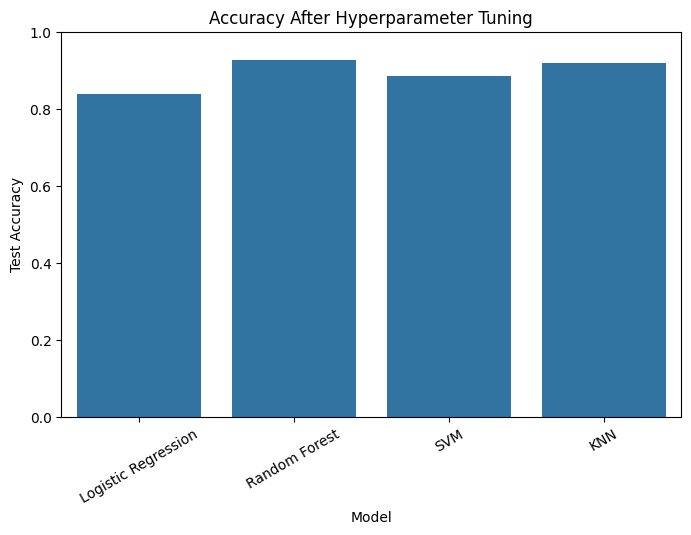

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Model",
    y="Test Accuracy",
    data=results_df
)

plt.title("Accuracy After Hyperparameter Tuning")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()

## Conclusion

1. Hyperparameter tuning improved the performance of all models. 
2. Random Forest achieved the highest accuracy and ROC-AUC, making it the best-performing model. 
3. Based on these results, Random Forest was selected as the final model for deployment and explainability.